In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import normalize

from sklearn import tree
from sklearn import linear_model
from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import sys,os
import seaborn as sns

%matplotlib inline

In [2]:
training_data = pd.read_csv("C:\Users\ANUHYA\Desktop\CERT_PROJECT_EDUREKA\HR_Data.csv")
training_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
training_data.shape

(14999, 10)

In [4]:
training_data.rename(columns={'sales':'department'}, inplace=True)

In [5]:
training_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
value=[1]
training_data[training_data.satisfaction_level.isin(value)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2023,1.0,0.41,4,174,3,0,0,0,technical,low
2101,1.0,0.74,3,220,4,0,0,0,technical,low
2111,1.0,0.92,5,161,3,1,0,0,support,low
2163,1.0,0.49,3,185,2,0,0,0,sales,low
2193,1.0,0.66,4,180,3,0,0,0,technical,low
2295,1.0,0.86,4,161,2,0,0,0,marketing,high
2321,1.0,0.65,4,202,4,1,0,0,hr,low
2491,1.0,0.94,4,144,3,0,0,0,support,low
3016,1.0,0.81,5,178,2,0,0,0,technical,low
3155,1.0,0.89,3,194,3,0,0,0,sales,medium


In [7]:
print (training_data['left'] == 1).sum()

3571


In [8]:
training_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
training_data = training_data.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'avgMonthlyHrs',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        })
training_data.describe()


,satisfaction,evaluation,projectCount,avgMonthlyHrs,yearsAtCompany,workAccident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


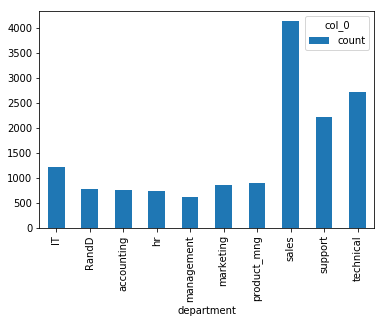

In [11]:
tab = pd.crosstab(index = training_data["department"],columns="count")      

tab.plot.bar()

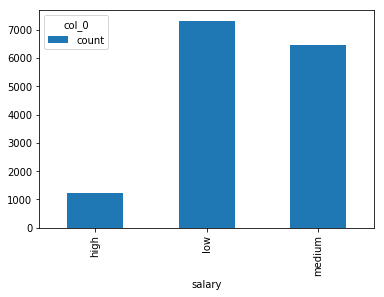

In [12]:
tab = pd.crosstab(index = training_data["salary"],columns="count")
tab.plot.bar()

In [13]:
not_left_pop_satisfaction = training_data['satisfaction'][training_data['left'] == 0].mean()
left_satisfaction = training_data[training_data['left']==1]['satisfaction'].mean()

print( 'The mean satisfaction for employees that have not left is: ' + str(not_left_pop_satisfaction))
print( 'The mean satisfaction for employees that have left is: ' + str(left_satisfaction) )

The mean satisfaction for employees that have not left is: 0.66680959048
The mean satisfaction for employees that have left is: 0.440098011761


In [14]:
import scipy.stats as stats
stats.ttest_1samp(a=training_data[training_data['left']==1]['satisfaction'],popmean = not_left_pop_satisfaction) 
#Sample of Employee satisfaction who left 
# Employee Who Have not left satisfaction mean

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

In [15]:
dof = len(training_data[training_data['left']==1])

RightQ = stats.t.ppf(0.975,dof)
LeftQ = stats.t.ppf(0.025,dof)

print('The right quartile range of this t-distribution is: ' + str(RightQ))
print('The left quartile range of this t-distribution is: ' + str(LeftQ))

The right quartile range of this t-distribution is: 1.9606285216
The left quartile range of this t-distribution is: -1.9606285216


In [16]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['department', 'salary']
    data_combined = pd.concat([df_train[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
data_train = encode_features(training_data)
data_train.head()

,satisfaction,evaluation,projectCount,avgMonthlyHrs,yearsAtCompany,workAccident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [17]:
data_train.department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1], dtype=int64)

In [18]:
data_train.salary.unique()

array([1, 2, 0], dtype=int64)

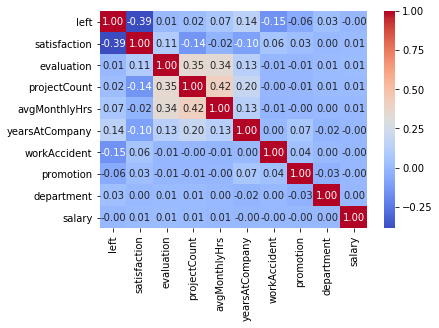

In [19]:
t = sns.heatmap(data_train[["left","satisfaction","evaluation","projectCount","avgMonthlyHrs","yearsAtCompany","workAccident","promotion","department","salary"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

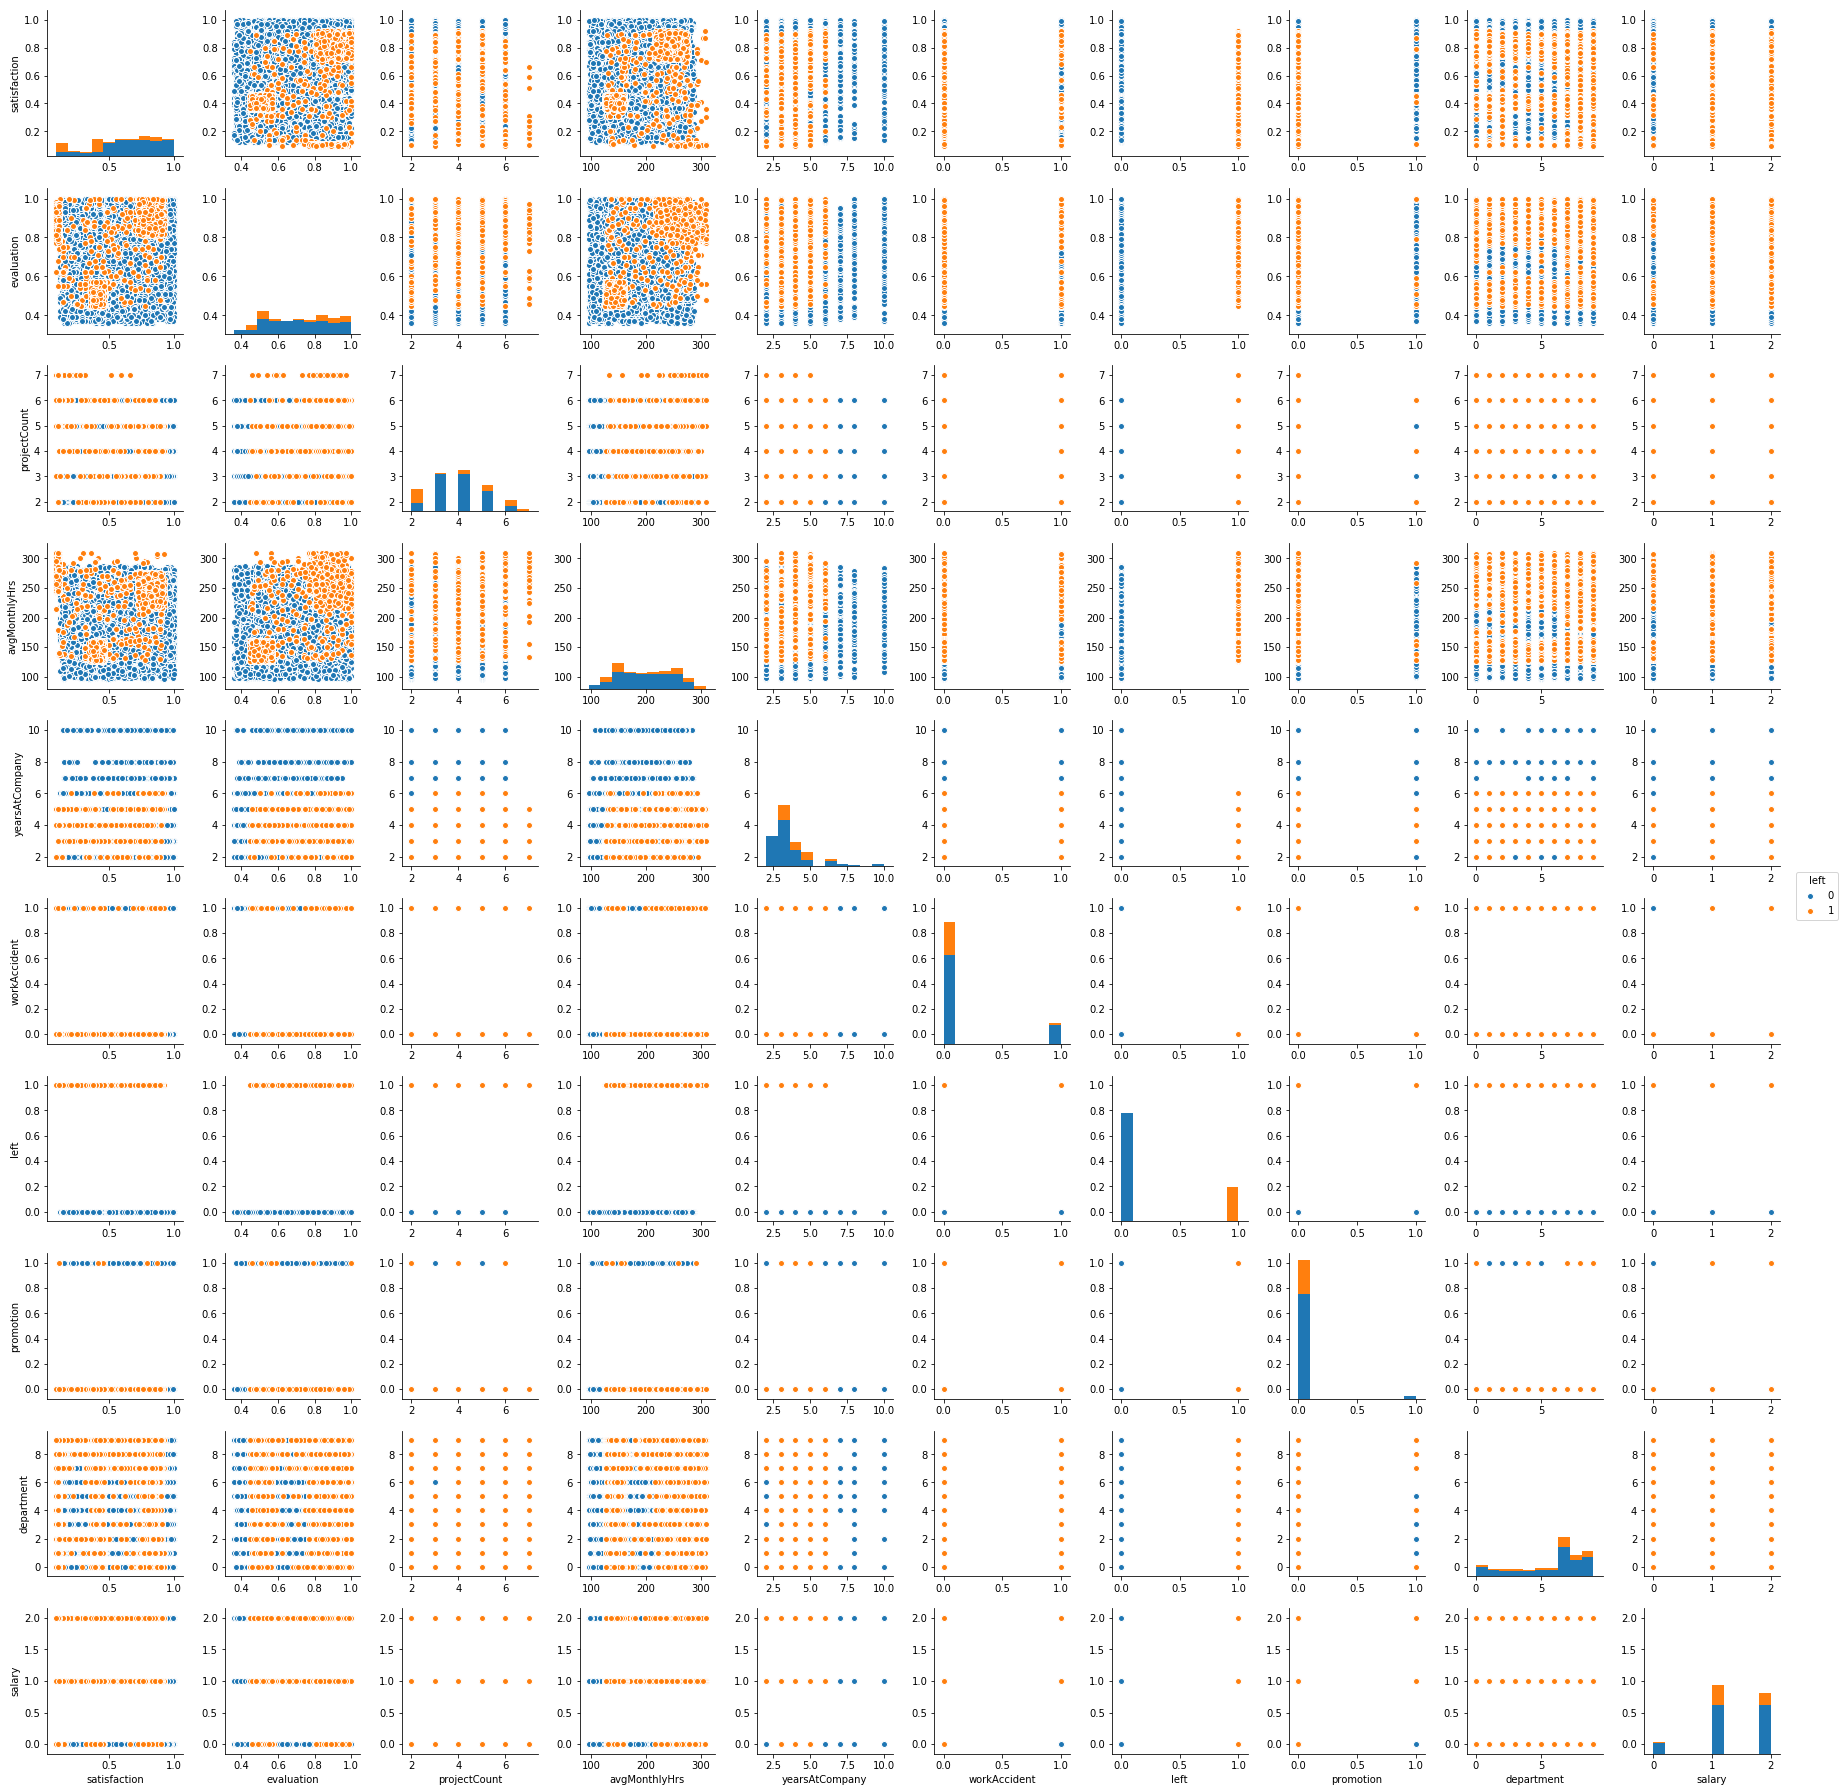

In [20]:
sns.pairplot(data_train,hue='left')

Text(0,0.5,u'Employee Count')

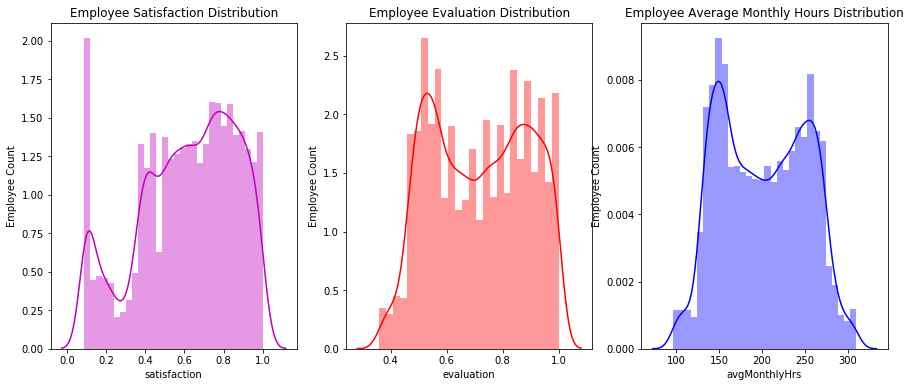

In [21]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(training_data.satisfaction,color="m", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

sns.distplot(training_data.evaluation, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(training_data.avgMonthlyHrs, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

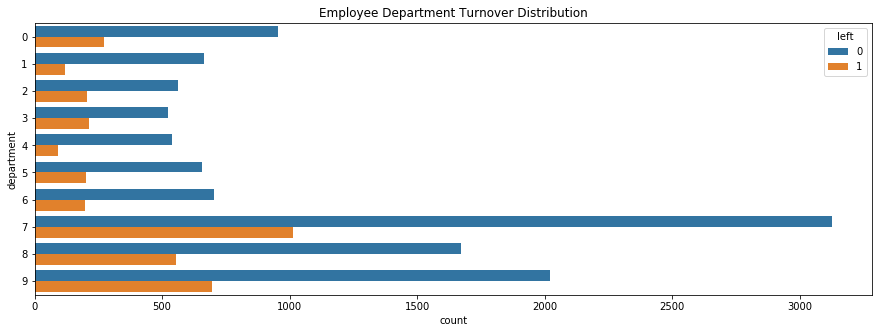

In [22]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=training_data).set_title('Employee Department Turnover Distribution');

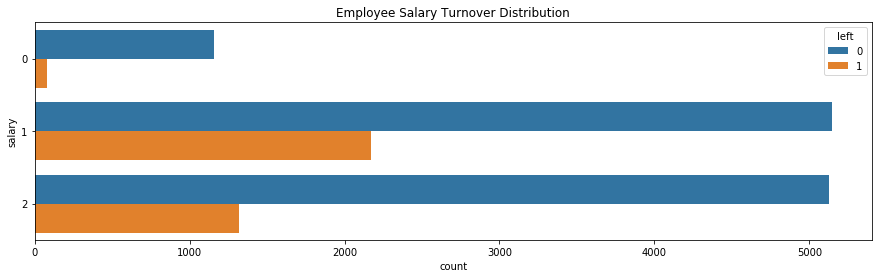

In [23]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=training_data).set_title('Employee Salary Turnover Distribution');

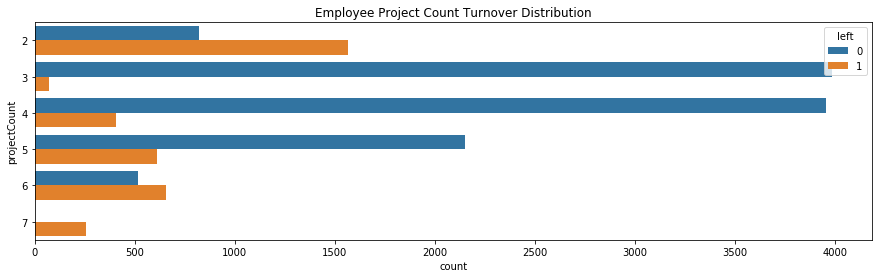

In [24]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="projectCount", hue='left', data=training_data).set_title('Employee Project Count Turnover Distribution');

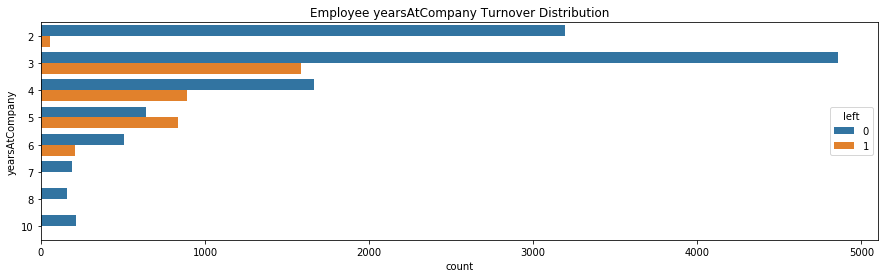

In [25]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="yearsAtCompany", hue='left', data=data_train).set_title('Employee yearsAtCompany Turnover Distribution');

Text(0.5,1,u'Employee avgMonthlyHrs Turnover Distribution')

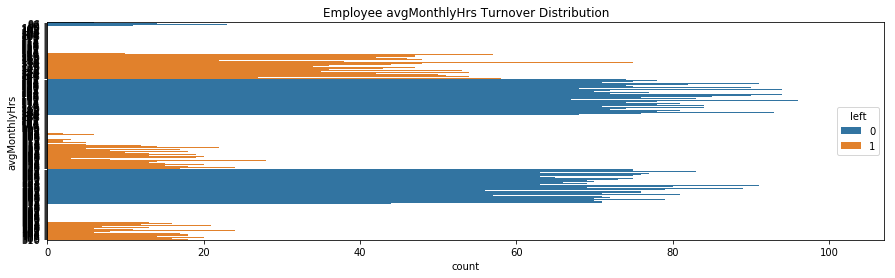

In [26]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="avgMonthlyHrs", hue='left', data=data_train).set_title('Employee avgMonthlyHrs Turnover Distribution')

Text(3.8,4.5,u'left')

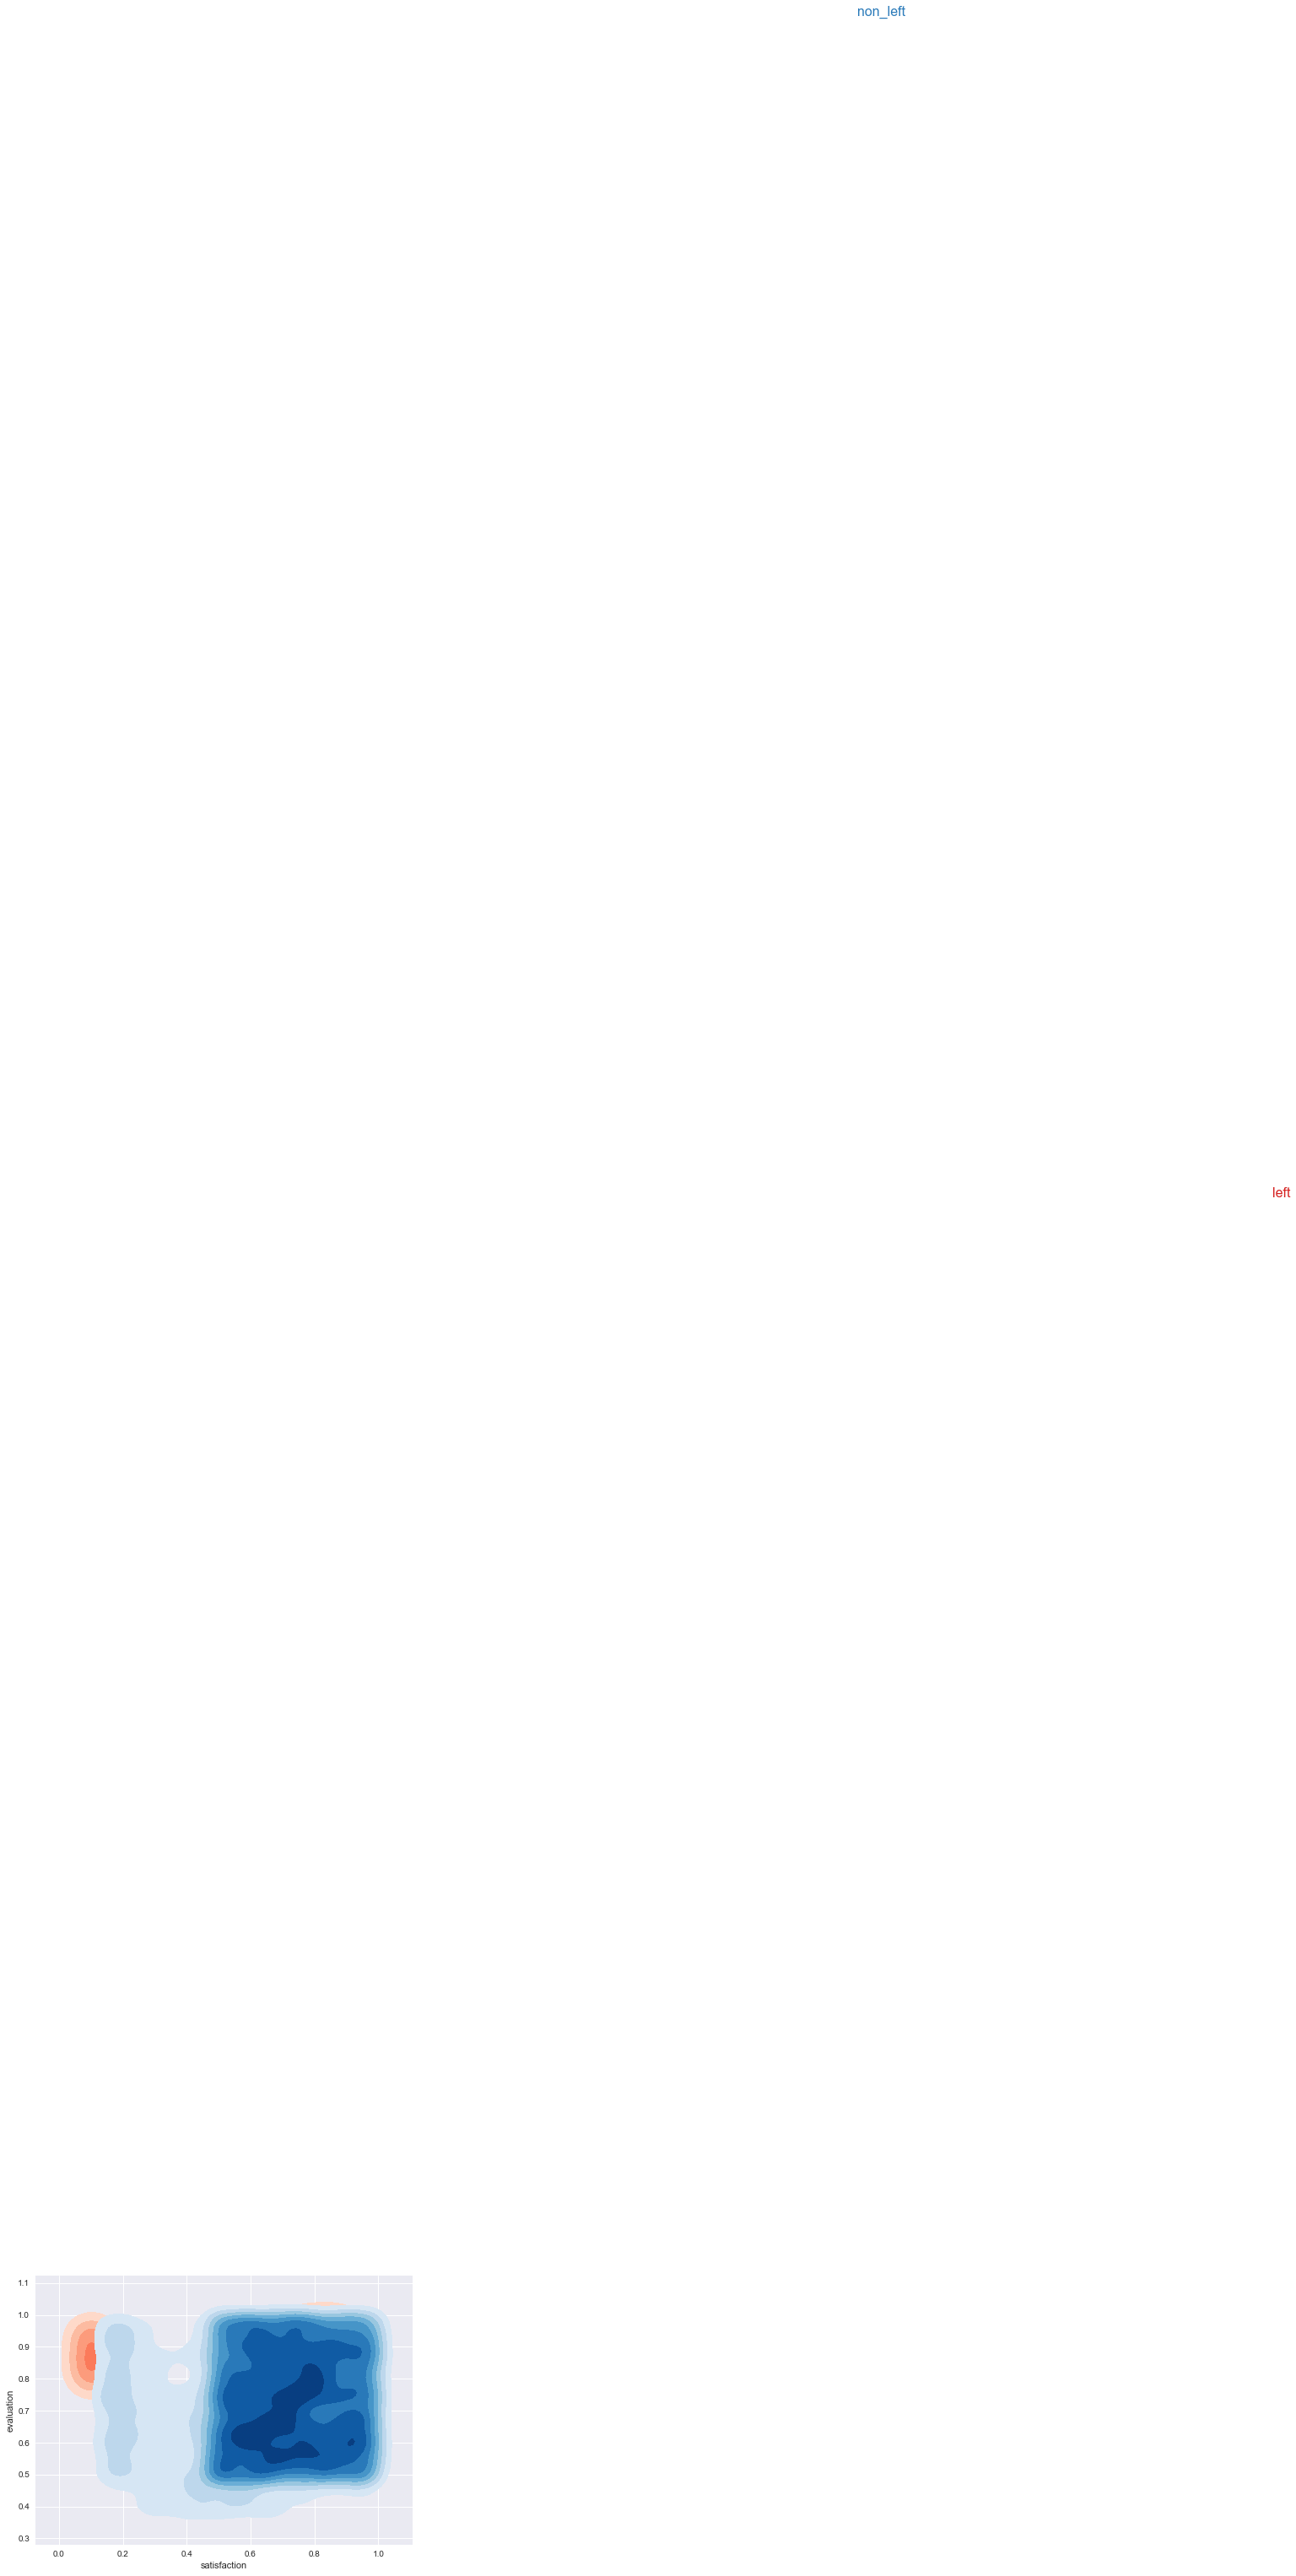

In [28]:
sns.set(style="darkgrid")

# Subset the dataset
left = training_data.query("left == 1")
non_left = training_data.query("left == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(left.satisfaction, left.evaluation,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(non_left.satisfaction, non_left.evaluation,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "non_left", size=16, color=blue)
ax.text(3.8, 4.5, "left", size=16, color=red)

Text(3.8,4.5,u'left')

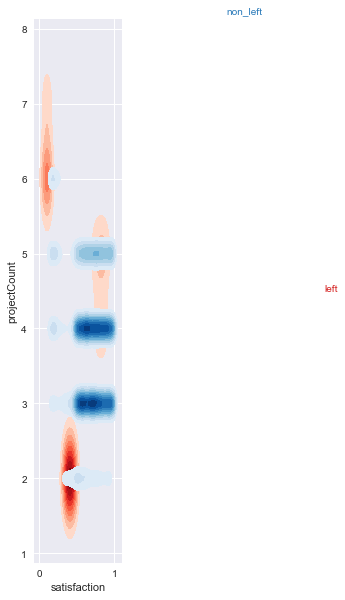

In [29]:
sns.set(style="darkgrid")

# Subset the dataset
left = training_data.query("left == 1")
non_left = training_data.query("left == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(left.satisfaction, left.projectCount,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(non_left.satisfaction, non_left.projectCount,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "non_left", size=10, color=blue)
ax.text(3.8, 4.5, "left", size=10, color=red)

Text(3.8,4.5,u'left')

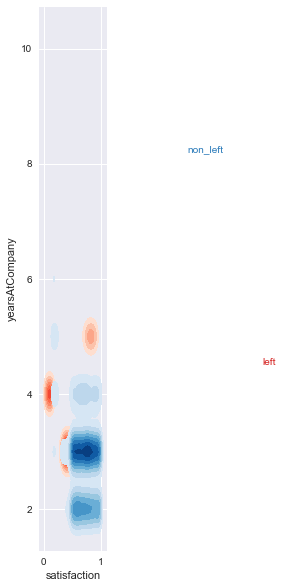

In [30]:
sns.set(style="darkgrid")

# Subset the dataset 
left = training_data.query("left == 1")
non_left = training_data.query("left == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(left.satisfaction, left.yearsAtCompany,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(non_left.satisfaction, non_left.yearsAtCompany,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "non_left", size=10, color=blue)
ax.text(3.8, 4.5, "left", size=10, color=red)

Text(3.4,4.8,u'salary 2.0-MEDIUM')

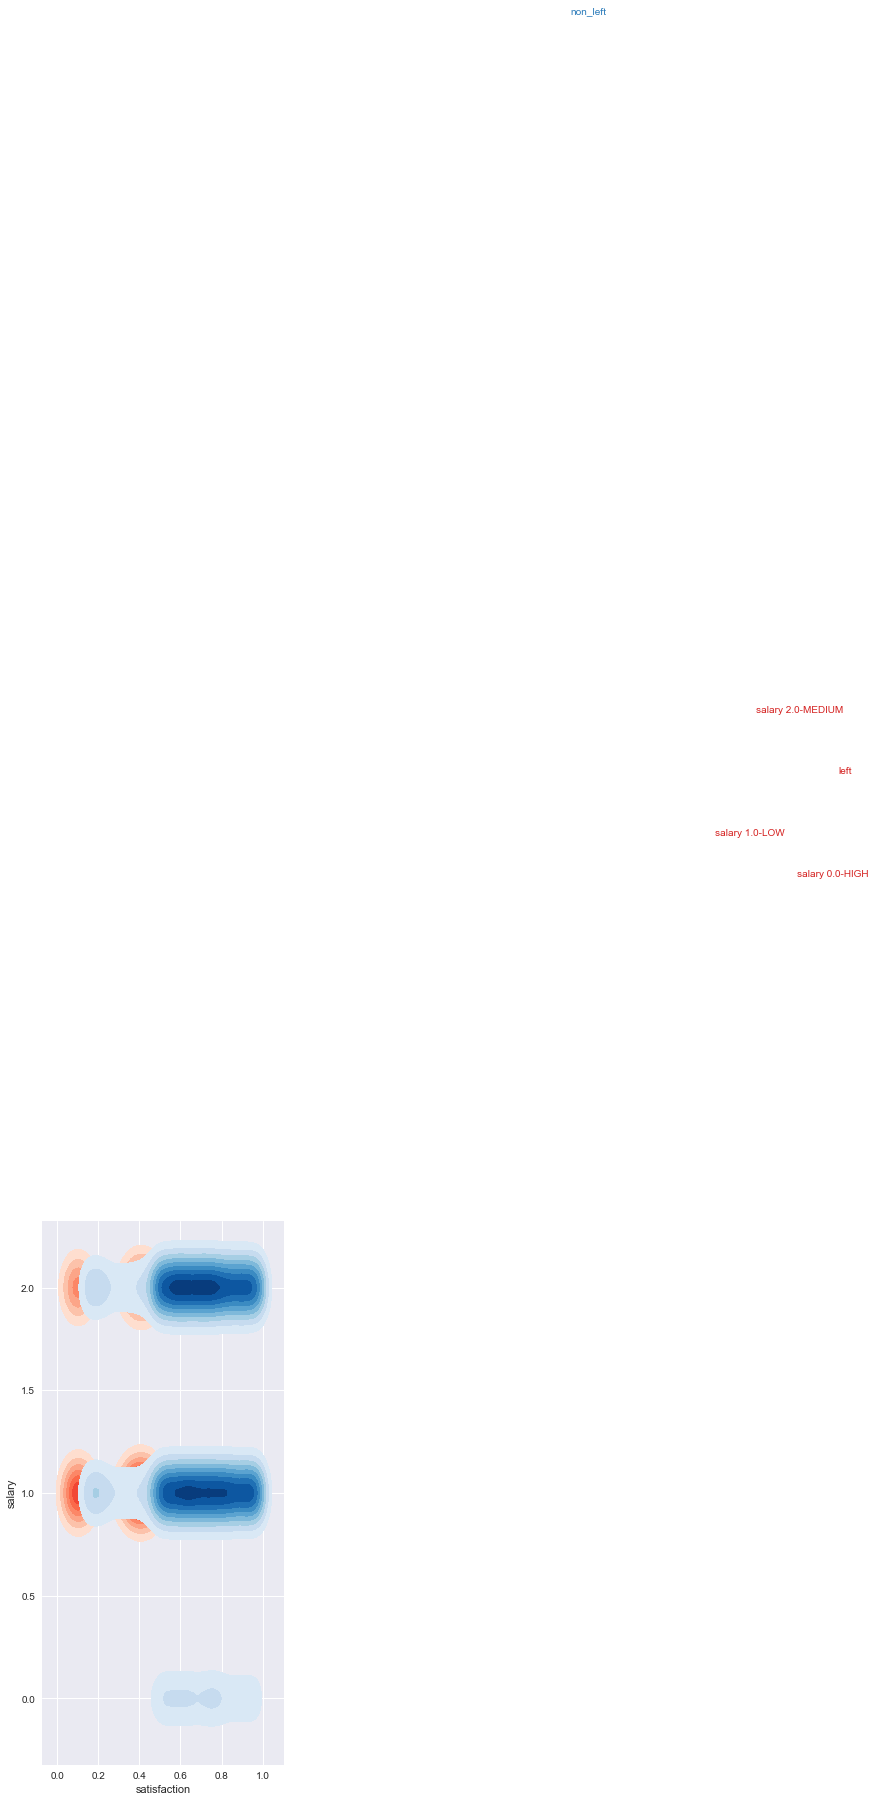

In [31]:
sns.set(style="darkgrid")

# Subset the dataset
left = training_data.query("left == 1")
non_left = training_data.query("left == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(left.satisfaction, left.salary,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(non_left.satisfaction, non_left.salary,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "non_left", size=10, color=blue)
ax.text(3.8, 4.5, "left", size=10, color=red)
ax.text(3.6, 4.0, "salary 0.0-HIGH", size=10, color=red)
ax.text(3.2, 4.2, "salary 1.0-LOW", size=10, color=red)
ax.text(3.4, 4.8, "salary 2.0-MEDIUM", size=10, color=red)

Text(3.4,4.8,u'salary 2.0-MEDIUM')

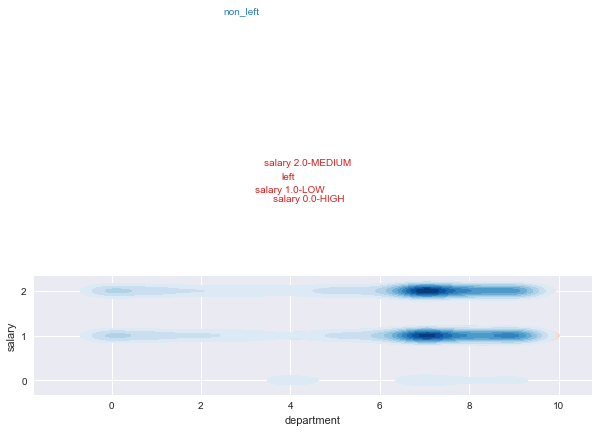

In [32]:
sns.set(style="darkgrid")

# Subset dataset
left = training_data.query("left == 1")
non_left = training_data.query("left == 0")

# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(left.department, left.salary,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(non_left.department, non_left.salary,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "non_left", size=10, color=blue)
ax.text(3.8, 4.5, "left", size=10, color=red)
ax.text(3.6, 4.0, "salary 0.0-HIGH", size=10, color=red)
ax.text(3.2, 4.2, "salary 1.0-LOW", size=10, color=red)
ax.text(3.4, 4.8, "salary 2.0-MEDIUM", size=10, color=red)

([<matplotlib.axis.YTick at 0x1ceb29b0>,
 <a list of 9 Text yticklabel objects>)

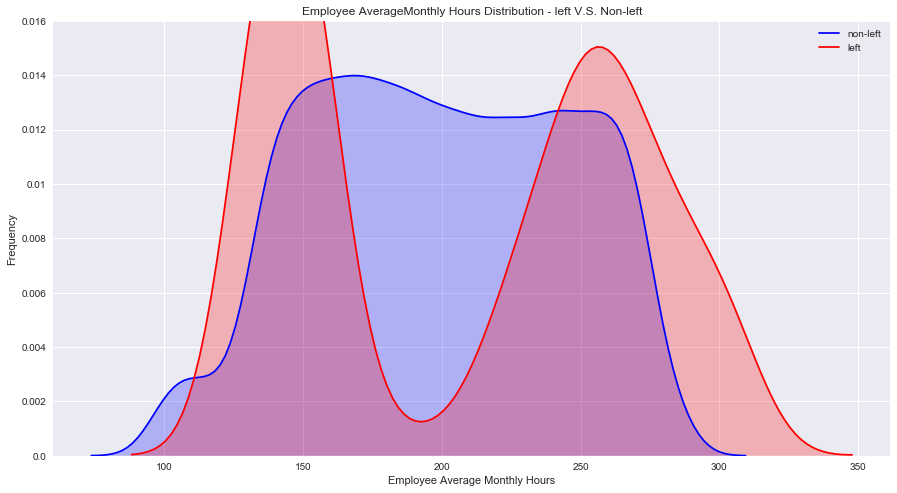

In [33]:
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(training_data.loc[(training_data['left'] == 0),'avgMonthlyHrs'] , color='b',shade=True, label='non-left')
ax=sns.kdeplot(training_data.loc[(training_data['left'] == 1),'avgMonthlyHrs'] , color='r',shade=True, label='left')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - left V.S. Non-left')
plt.yticks(ax.get_yticks(), ax.get_yticks() * 2)

([<matplotlib.axis.YTick at 0x1d5f0b38>,
 <a list of 10 Text yticklabel objects>)

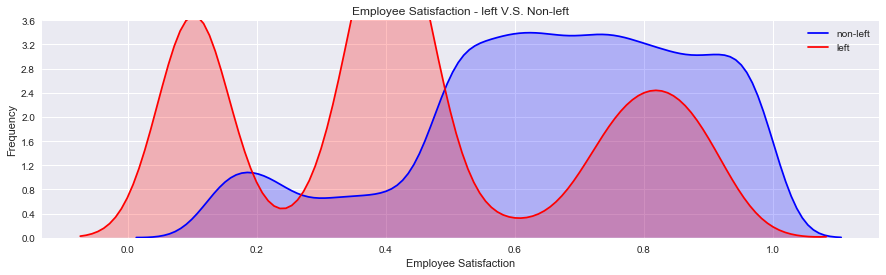

In [34]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(training_data.loc[(training_data['left'] == 0),'satisfaction'] , color='b',shade=True, label='non-left')
ax=sns.kdeplot(training_data.loc[(training_data['left'] == 1),'satisfaction'] , color='r',shade=True, label='left')
ax.set(xlabel='Employee Satisfaction', ylabel='Frequency')
plt.title('Employee Satisfaction - left V.S. Non-left')
plt.yticks(ax.get_yticks(), ax.get_yticks() * 2)

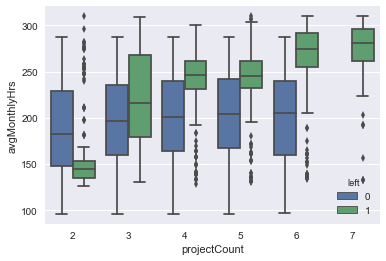

In [35]:
sns.boxplot(x="projectCount", y="avgMonthlyHrs", hue="left", data=training_data)

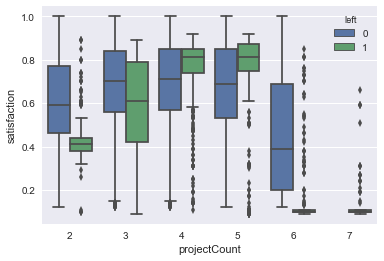

In [36]:
sns.boxplot(x="projectCount", y="satisfaction", hue="left", data=training_data)

In [37]:
X = training_data.drop(['left'], axis=1)
Y = training_data.left
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11999, 9)
(3000, 9)
(11999L,)
(3000L,)


In [38]:
from sklearn.tree import DecisionTreeClassifier
classifiers = {}
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred =  dtree.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
classifiers["Decision Tree"]=dtree

[[2244   31]
 [  19  706]]
0.983333333333


In [42]:
from sklearn import tree
tree.export_graphviz(dtree,out_file='hremployees.dot')

In [43]:
# Artifical Neural Network
clf = MLPClassifier()
clf.set_params(hidden_layer_sizes =(100,100), max_iter = 1000,alpha = 0.01, momentum = 0.7)
nn_clf = clf.fit(X_train,Y_train)
nn_predict = nn_clf.predict(X_test)

nn_acc = accuracy_score(Y_test,nn_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')

print("Artificial Nueral Network:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["NeuralNetwork"]=clf

Artificial Nueral Network:
(0.88183195561246919, ' - ', 0.8847502890627007)


In [44]:
 #Deep Neural Network
clf = MLPClassifier()
clf.set_params(hidden_layer_sizes =(100,100,100,100), max_iter = 100,alpha = 0.3, momentum = 0.7,activation = "relu")
nn_clf = clf.fit(X_train,Y_train)
nn_predict = nn_clf.predict(X_test)
nn_acc = accuracy_score(Y_test,nn_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Deep Neural Network:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["DeepNeuralNetwork"]=clf

Deep Neural Network:
(0.88866577476789899, ' - ', 0.86508055850501742)


In [45]:
#Multinomial Naive Bayes
clf = MultinomialNB()
clf.set_params(alpha = 0.1)
nb_clf = clf.fit(X_train,Y_train)
nb_predict = nb_clf.predict(X_test)
nb_acc = accuracy_score(Y_test,nb_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Multinomial Naive Bayes:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["MultinomialNaiveBayes"]=clf

Multinomial Naive Bayes:
(0.76281370421090566, ' - ', 0.76281370421090566)


In [46]:
#Support Vector Machine
clf = svm.SVC()
clf.set_params(C = 100, kernel = "rbf")
svm_clf = clf.fit(X_train,Y_train)
svm_predict = svm_clf.predict(X_test)
svm_acc = accuracy_score(Y_test,svm_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Support Vector Machines:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["SupportVectorMachine"]=clf

Support Vector Machines:
(0.95782859027448386, ' - ', 0.95782859027448386)


In [47]:
#Logistic Regression
clf = LogisticRegression()
clf.set_params(C = 10, max_iter = 10)
lr_clf = clf.fit(X_train,Y_train)
lr_predict = lr_clf.predict(X_test)
lr_acc = accuracy_score(Y_test,lr_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Logistic Regression:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["LogisticRegression"]=clf

Logistic Regression:
(0.75714620177976977, ' - ', 0.75714620177976977)


In [48]:
#k-NN Classifier
clf = KNeighborsClassifier()
clf.set_params(n_neighbors= 5,leaf_size = 30)
knn_clf = clf.fit(X_train,Y_train)
knn_predict = knn_clf.predict(X_test)
knn_acc = accuracy_score(Y_test,knn_predict)
param =  knn_clf.get_params()
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("k-NN :")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["KNN"]=clf

k-NN :
(0.93216218934874262, ' - ', 0.93216218934874262)


In [49]:
#Random Forest Classifier
clf = RandomForestClassifier()
clf.set_params(n_estimators = 500, max_depth = 100)
rf_clf = clf.fit(X_train,Y_train)
rf_predict = rf_clf.predict(X_test)
rf_acc = accuracy_score(Y_test,rf_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Random Forest Classifier:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["RandomForest"]=clf

Random Forest Classifier:
(0.99166450977859477, ' - ', 0.99149770410720195)


In [50]:
#Gradient Boosting Classifier
clf = GradientBoostingClassifier()
clf.set_params(n_estimators = 100,learning_rate = 0.25)
gb_clf = clf.fit(X_train,Y_train)
gb_predict = gb_clf.predict(X_test)
gb_acc = accuracy_score(Y_test,gb_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("GradientBoostingClassifier:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["GradientBoostingClassifier"]=clf

GradientBoostingClassifier:
(0.97808019774087818, ' - ', 0.97841360057657456)


In [51]:
#Perceptron
clf = linear_model.Perceptron()
pt_clf = clf.fit(X_train,Y_train)
pt_predict = pt_clf.predict(X_test)
pt_acc = accuracy_score(Y_test,pt_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Perceptron:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["Perceptron"]=clf

C:\Users\ANUHYA\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron:
(0.59977838642017578, ' - ', 0.59977838642017578)


In [53]:
#Next we proceed to apply "Feature Scaling" to see if the performance of our various classifiers improves
#Feature scaling aims to bring the values of our numerical features between 0 and 1
#This is mainly done because large numerical values may skew our data and make the classifier weight it more

#this technique is known to improve the performance of classifiers using gradient descent such as neural nets,perceptron,etc

XX = training_data.drop(['left'], axis=1)
YY = training_data.left
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XX[XX.columns] = scaler.fit_transform(XX[XX.columns])

XX.head()

,satisfaction,evaluation,projectCount,avgMonthlyHrs,yearsAtCompany,workAccident,promotion,department,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.777778,0.5
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.777778,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.777778,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.777778,0.5
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.777778,0.5


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11999, 9)
(3000, 9)
(11999L,)
(3000L,)


In [55]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifiers = {}
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred =  dtree.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
classifiers["Decision Tree"]=dtree

[[2241   34]
 [  20  705]]
0.982


In [56]:
# Artifical Neural Network
clf = MLPClassifier()
clf.set_params(hidden_layer_sizes =(100,100), max_iter = 1000,alpha = 0.01, momentum = 0.7)
nn_clf = clf.fit(X_train,Y_train)
nn_predict = nn_clf.predict(X_test)
nn_acc = accuracy_score(Y_test,nn_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Artificial Nueral Network:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["NeuralNetwork"]=clf

Artificial Nueral Network:
(0.96674546949916851, ' - ', 0.96599498332984957)


In [57]:
#Deep Neural Network
clf = MLPClassifier()
clf.set_params(hidden_layer_sizes =(100,100,100,100), max_iter = 100,alpha = 0.3, momentum = 0.7,activation = "relu")
nn_clf = clf.fit(X_train,Y_train)
nn_predict = nn_clf.predict(X_test)
nn_acc = accuracy_score(Y_test,nn_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Deep Neural Network:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["DeepNeuralNetwork"]=clf

Deep Neural Network:
(0.9654956777747763, ' - ', 0.96557963639789546)


In [58]:
#Support Vector Machine
clf = svm.SVC()
clf.set_params(C = 100, kernel = "rbf")
svm_clf = clf.fit(X_train,Y_train)
svm_predict = svm_clf.predict(X_test)
svm_acc = accuracy_score(Y_test,svm_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Support Vector Machines:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["SupportVectorMachine"]=clf

Support Vector Machines:
(0.9523285876124451, ' - ', 0.9523285876124451)


In [59]:
#Multinomial Naive Bayes
clf = MultinomialNB()
clf.set_params(alpha = 0.1)
nb_clf = clf.fit(X_train,Y_train)
nb_predict = nb_clf.predict(X_test)
nb_acc = accuracy_score(Y_test,nb_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Multinomial Naive Bayes:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["MultinomialNaiveBayes"]=clf

Multinomial Naive Bayes:
(0.76281370421090566, ' - ', 0.76281370421090566)


In [60]:
#Logistic Regression
clf = LogisticRegression()
clf.set_params(C = 10, max_iter = 10)
lr_clf = clf.fit(X_train,Y_train)
lr_predict = lr_clf.predict(X_test)
lr_acc = accuracy_score(Y_test,lr_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Logistic Regression:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["LogisticRegression"]=clf

Logistic Regression:
(0.76839877660794664, ' - ', 0.76839877660794664)


In [61]:
#k-NN Classifier
clf = KNeighborsClassifier()
clf.set_params(n_neighbors= 5,leaf_size = 30)
knn_clf = clf.fit(X_train,Y_train)
knn_predict = knn_clf.predict(X_test)
knn_acc = accuracy_score(Y_test,knn_predict)
param =  knn_clf.get_params()
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("k-NN :")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["KNN"]=clf

k-NN :
(0.95232803205650374, ' - ', 0.95232803205650374)


In [62]:
#Random Forest Classifier
clf = RandomForestClassifier()
clf.set_params(n_estimators = 500, max_depth = 100)
rf_clf = clf.fit(X_train,Y_train)
rf_predict = rf_clf.predict(X_test)
rf_acc = accuracy_score(Y_test,rf_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("Random Forest Classifier:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["RandomForest"]=clf

Random Forest Classifier:
(0.99166450977859477, ' - ', 0.99166450977859477)


In [63]:
#AdaBoost
clf = AdaBoostClassifier()
clf.set_params(n_estimators = 10, learning_rate = 0.5)
ada_clf = clf.fit(X_train,Y_train)
ada_predict = ada_clf.predict(X_test)
ada_acc = accuracy_score(Y_test,ada_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("AdaBoost:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["AdaBoost"]=clf

AdaBoost:
(0.9077421087329457, ' - ', 0.9077421087329457)


In [64]:
#Gradient Boosting Classifier
clf = GradientBoostingClassifier()
clf.set_params(n_estimators = 100,learning_rate = 0.25)
gb_clf = clf.fit(X_train,Y_train)
gb_predict = gb_clf.predict(X_test)
gb_acc = accuracy_score(Y_test,gb_predict)
accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
print("GradientBoostingClassifier:")
print (accuracy.mean(), " - ",f_score.mean())
classifiers["GradientBoostingClassifier"]=clf

GradientBoostingClassifier:
(0.97816360057657459, ' - ', 0.97808019774087818)


In [65]:
#Here we print the performance of the various classifiers
print ("accuracy","              ","F-score")
for clf in classifiers.values():
    accuracy = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'accuracy')
    f_score = cross_val_score(clf, X_train , Y_train, cv=10,scoring = 'f1_micro')
    for i in classifiers:
        if classifiers[i]== clf:
            print (i),
            break
    print ( " : ",accuracy.mean(), "  ",f_score.mean())

('accuracy', '              ', 'F-score')
KNN (' : ', 0.95232803205650374, '  ', 0.95232803205650374)
DeepNeuralNetwork (' : ', 0.96682949820335529, '  ', 0.96507935757825736)
LogisticRegression (' : ', 0.76839877660794664, '  ', 0.76839877660794664)
NeuralNetwork (' : ', 0.96649741382922261, '  ', 0.96766338720837086)
Decision Tree (' : ', 0.97549602968474292, '  ', 0.97574609965006931)
RandomForest (' : ', 0.99158124583188378, '  ', 0.99166450977859477)
MultinomialNaiveBayes (' : ', 0.76281370421090566, '  ', 0.76281370421090566)
AdaBoost (' : ', 0.9077421087329457, '  ', 0.9077421087329457)
SupportVectorMachine (' : ', 0.9523285876124451, '  ', 0.9523285876124451)
GradientBoostingClassifier (' : ', 0.97816360057657459, '  ', 0.97808019774087818)


ROC AUC: 0.99


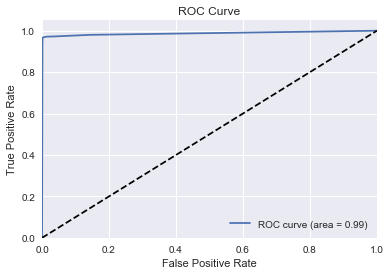

In [70]:
#RandomForest (' : ', 0.99166450977859477, '  ', 0.99158124583188378)
#GradientBoostingClassifier (' : ', 0.97808019774087818, '  ', 0.97816360057657459)
#Decision Tree (' : ', 0.97649603061066959, '  ', 0.97616325260179582)
#NeuralNetwork (' : ', 0.96732977586558511, '  ', 0.96766227667519222)
#DeepNeuralNetwork (' : ', 0.96566338628244419, '  ', 0.96466345578480739)


#ROC Curve for Random Forest Classifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
 
# shuffle and split training and test sets
#X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size = 0.20, random_state = 5)
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=.25)

forest = RandomForestClassifier()
#clf.set_params(n_estimators = 100, max_depth = 10, max_features = 3, criterion = 'gini')
#rf_clf = clf.fit(X_train,Y_train)
#rf_predict = rf_clf.predict(X_test)

forest.fit(X_train, Y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(Y_test, forest.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.99


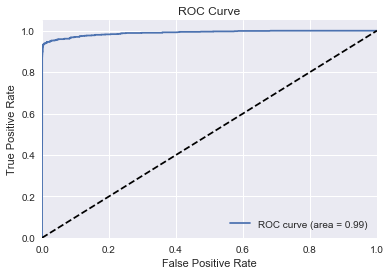

In [71]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.97


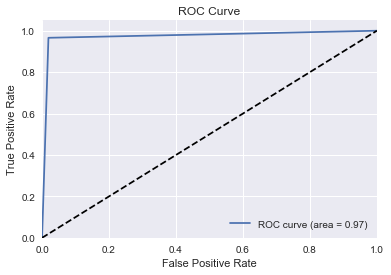

In [72]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()